In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
from collections import Counter

from numpy.fft import fftfreq, fft

from neuron import h
from neuron.units import mV, ms, sec
h.load_file('stdrun.hoc')

sys.path.insert(1, "./utils/")
from Net import Net
from Cell import HH, INF

## HH cell

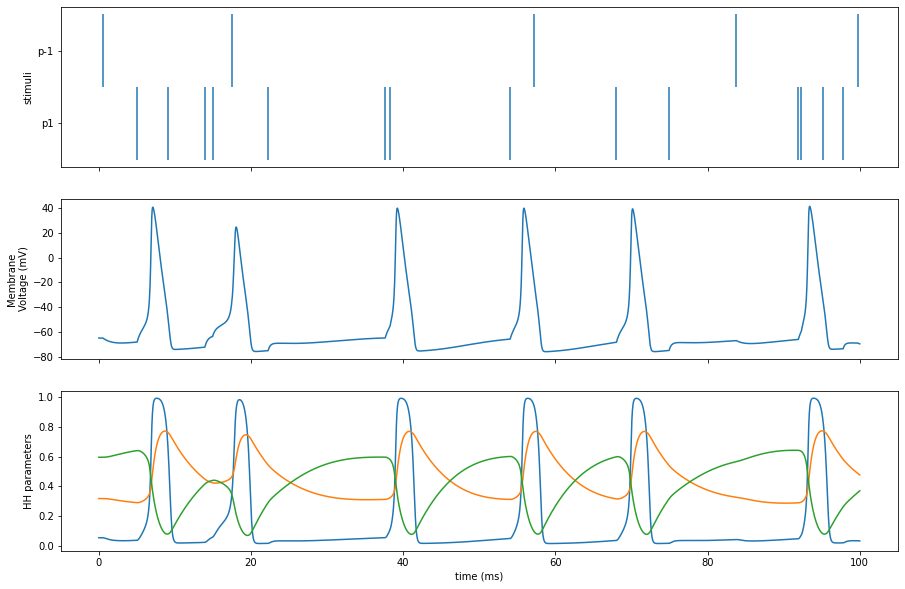

In [2]:
# initialize cell
hh = HH(polarity = 1)

# add stimuli
hh.add_poisson_stimulus('p1', syn_title=1, stim_interval=10, delay=0, weight = .5)
hh.add_poisson_stimulus('p-1', syn_title=-1, stim_interval=15, delay=0, weight = .5)

# run simulation
sim_length = 100
h.finitialize()
h.continuerun(sim_length)

# plot results
hh.plot_cell()

## HH network

In [3]:
hhnet = Net(100, .8, HH)
hhnet.randomly_connect_cells(2, .5)
hhnet.initial_stimulation(3)

# run simulation
sim_length = 1000
t = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(sim_length)

hhnet.aggregate_all_spikes()

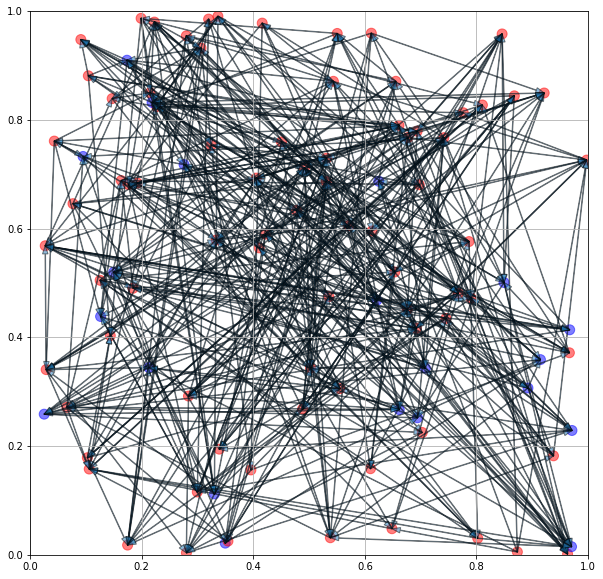

In [4]:
hhnet.show_cell_grid()

In [5]:
def color_inhib_vs_excit(polarity):
    # help coloring excitatory vs inhibitory stats in our plots
    if polarity == 1:
        return 'blue'
    else:
        return 'red'

def plot_raster(self, sim_length, ex_ratio):
    fig, axes = plt.subplots(2, 1, figsize = (15,10), sharex = True, gridspec_kw={'height_ratios': [ex_ratio, 1-ex_ratio]})
    
    ex_y = 0
    in_y = 0
    for i, cell in enumerate(self.cells):
        spikes = list(cell.spike_times)
        if cell.polarity == 1: # excitatory
            axes[0].vlines(spikes, ex_y, ex_y+1, color = color_inhib_vs_excit(cell.polarity))
            ex_y += 1
        else: # inhibatory
            axes[1].vlines(spikes, in_y, in_y+1, color = color_inhib_vs_excit(cell.polarity))
            in_y += 1
    # TODO: add initial poisson stimuli
    axes[0].set_xlim(0, sim_length)
    axes[0].set_ylim(0, ex_y)
    axes[1].set_ylim(0, in_y)
    axes[0].set_ylabel('excitatory', fontsize=16)
    axes[1].set_ylabel('inhibitory', fontsize=16)
    fig.tight_layout()
    plt.xlabel('time (ms)', fontsize=16)

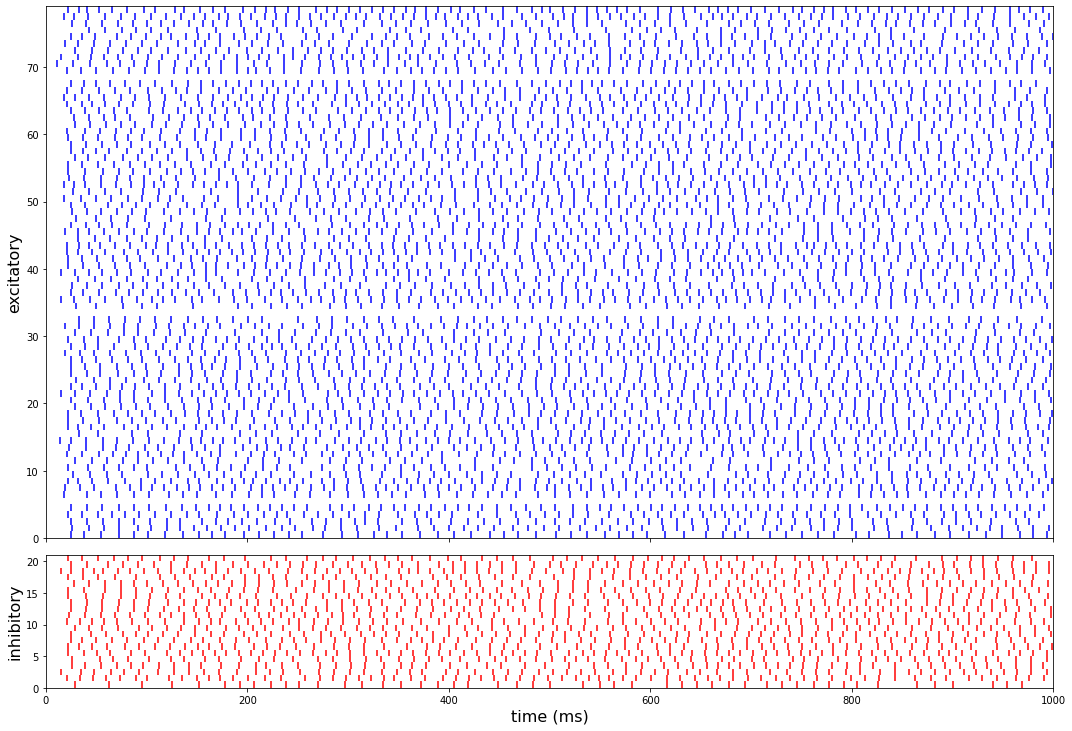

In [6]:
ex_ratio = .8
plot_raster(hhnet, sim_length, ex_ratio)

## INF cell

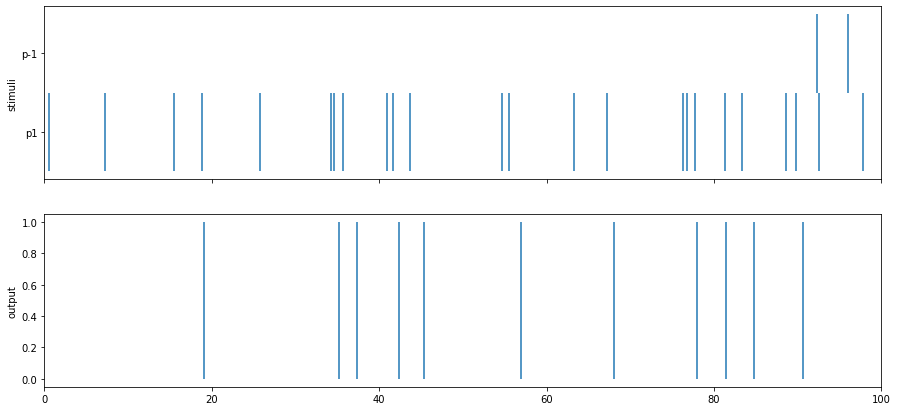

In [7]:
# initialize cell
inf = INF(polarity = 1)

# add stimuli
inf.add_poisson_stimulus('p1', syn_title=1, stim_interval=5, delay=0, weight = .5)
inf.add_poisson_stimulus('p-1', syn_title=-1, stim_interval=15, delay=0, weight = .5)

# run simulation
sim_length = 100
h.finitialize()
h.continuerun(sim_length)

# plot results
inf.plot_cell(sim_length)

## INF network

In [19]:
def plot_raster(self, sim_length, ex_ratio):
    fig, axes = plt.subplots(2, 1, figsize = (15,10), sharex = True, gridspec_kw={'height_ratios': [ex_ratio, 1-ex_ratio]})
    
    ex_y = 0
    in_y = 0
    for i, cell in enumerate(self.cells):
        spikes = list(cell.spike_times)
        if cell.polarity == 1: # excitatory
            axes[0].vlines(spikes, ex_y, ex_y+1, color = color_inhib_vs_excit(cell.polarity))
            ex_y += 1
        else: # inhibatory
            #print('here', i, spikes)
            axes[1].vlines(spikes, in_y, in_y+1, color = color_inhib_vs_excit(cell.polarity))
            in_y += 1
    # TODO: add initial poisson stimuli
    axes[0].set_xlim(0, sim_length)
    axes[0].set_ylim(0, ex_y)
    axes[1].set_ylim(0, in_y)
    axes[0].set_ylabel('excitatory', fontsize=16)
    axes[1].set_ylabel('inhibitory', fontsize=16)
    fig.tight_layout()
    plt.xlabel('time (ms)', fontsize=16)

In [22]:
infnet = Net(100, .8, INF)
infnet.randomly_connect_cells(delay = 2, weight = 1.5)

infnet.initial_stimulation(30, weight = 1)

# run simulation
sim_length = 50
h.finitialize(-65 * mV)
h.continuerun(sim_length)

infnet.aggregate_all_spikes()

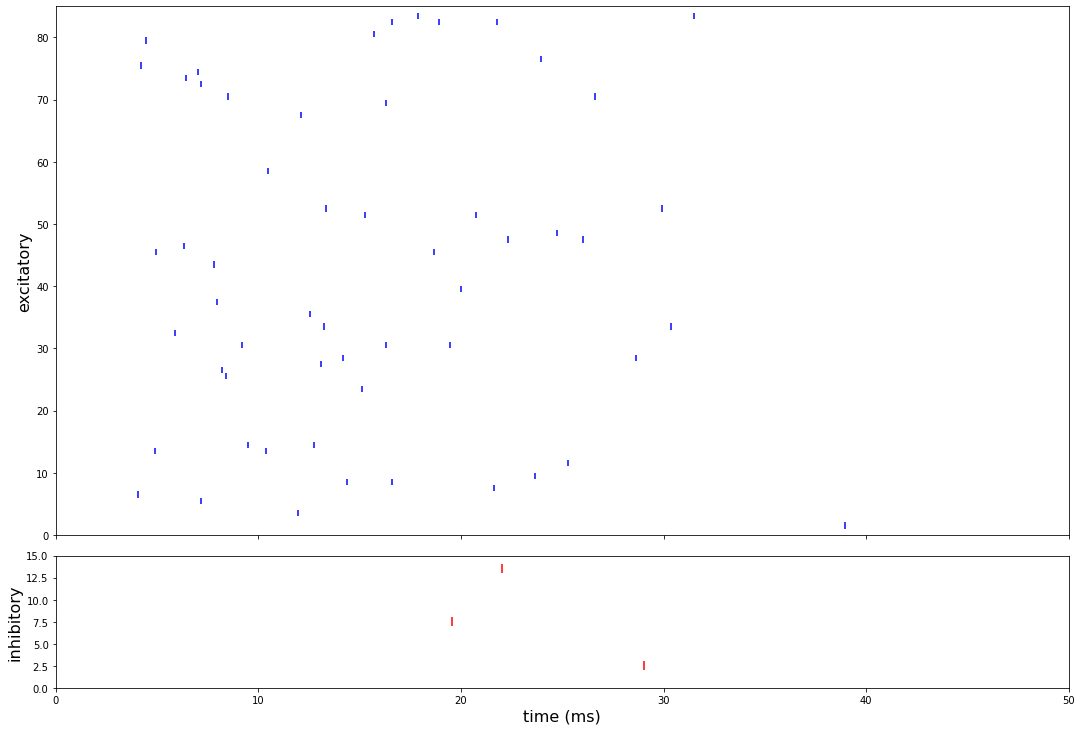

In [23]:
ex_ratio = .8
plot_raster(infnet, sim_length, ex_ratio)